<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>


> Bicycle bicycle bicycle  <br> I want to ride my bicycle <br> I want to ride my bike <br> I want to ride my bicycle <br>  I want to ride it where I like

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Bicycle Race (Queen)](https://www.youtube.com/watch?v=r2lT4oE4DxE)**

**ФИО:**

**Твой любимый аник:**

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 19.05.2024

__Жесткий дедлайн:__ 23:59MSK 26.05.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [161]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Спрос на велосипеды

В этой домашке мы будем работать с данными о спросе на велосипеды. Мы научимся его предсказывать.

In [162]:
df = pd.read_csv('bikes_rent.csv')
print(df.shape)
df.head( )

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [163]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

## 1. EDA

__а) [5 баллов]__ Проверьте, есть ли в данных пропуски 

In [164]:
df.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

Пропусков нет

__б) [5 баллов]__ Составьте список из категориальных переменных и список из действительных переменных.

In [165]:
var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

var_real =['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

target = 'cnt'

__в) [5 баллов]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами? 

<Axes: >

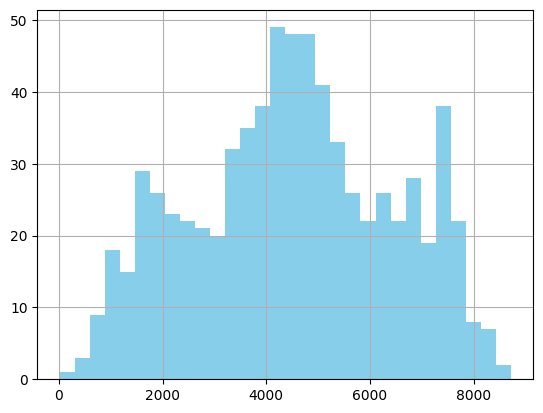

In [166]:
df['cnt'].hist(bins = 30, color = 'skyblue')

__Ответ:__ Нет

__г) [5 баллов]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания. 

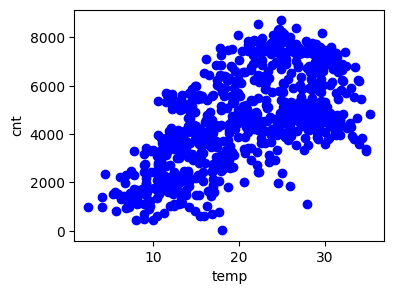

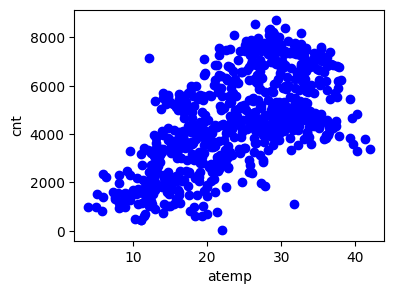

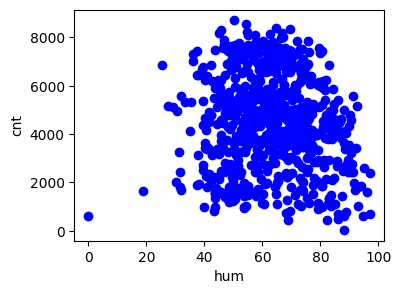

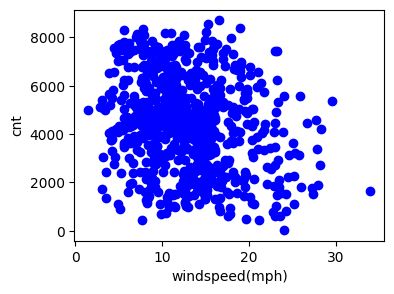

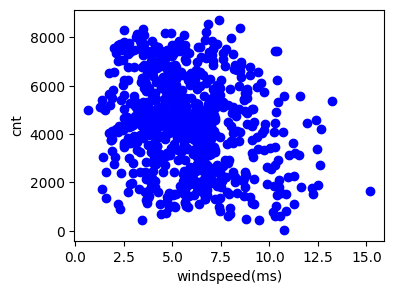

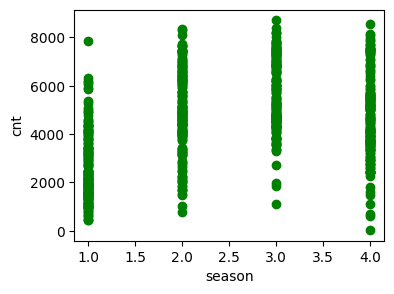

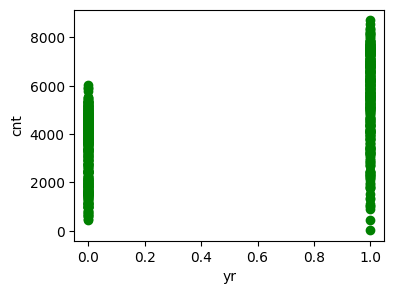

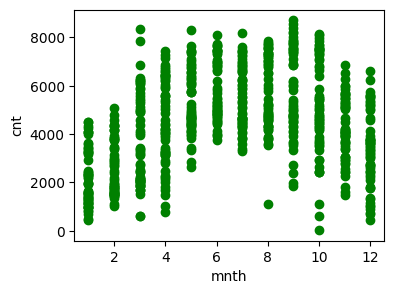

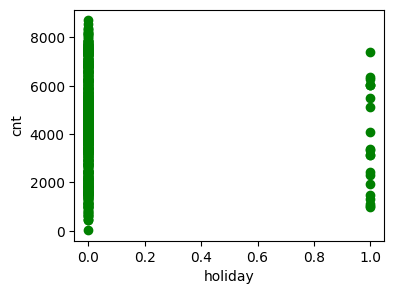

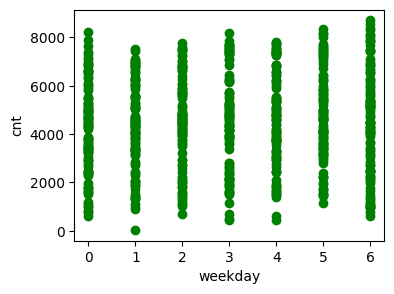

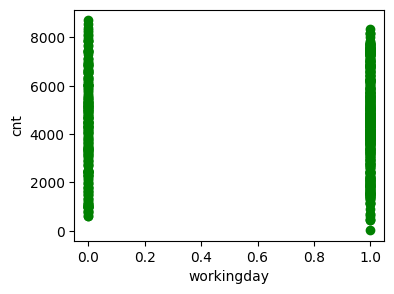

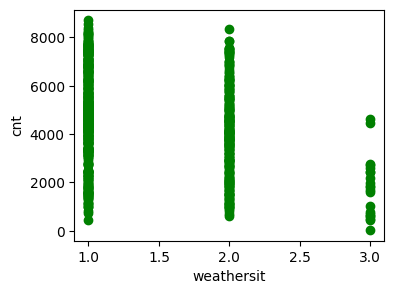

In [167]:
for var in var_real:
    plt.figure(figsize = (4, 3))
    plt.scatter(df[var], df[target], color = 'blue')
    plt.xlabel(var)
    plt.ylabel('cnt')
    plt.show()
for var in var_cat:
    plt.figure(figsize = (4, 3))
    plt.scatter(df[var], df[target], color = 'green')
    plt.xlabel(var)
    plt.ylabel('cnt')
    plt.show()

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно? 

__Ответ:__  Число прокатов увеличивается в летниие месяцы и уменьшается в зимние

__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах? 

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed(mph)'}>],
       [<Axes: title={'center': 'windspeed(ms)'}>, <Axes: >]],
      dtype=object)

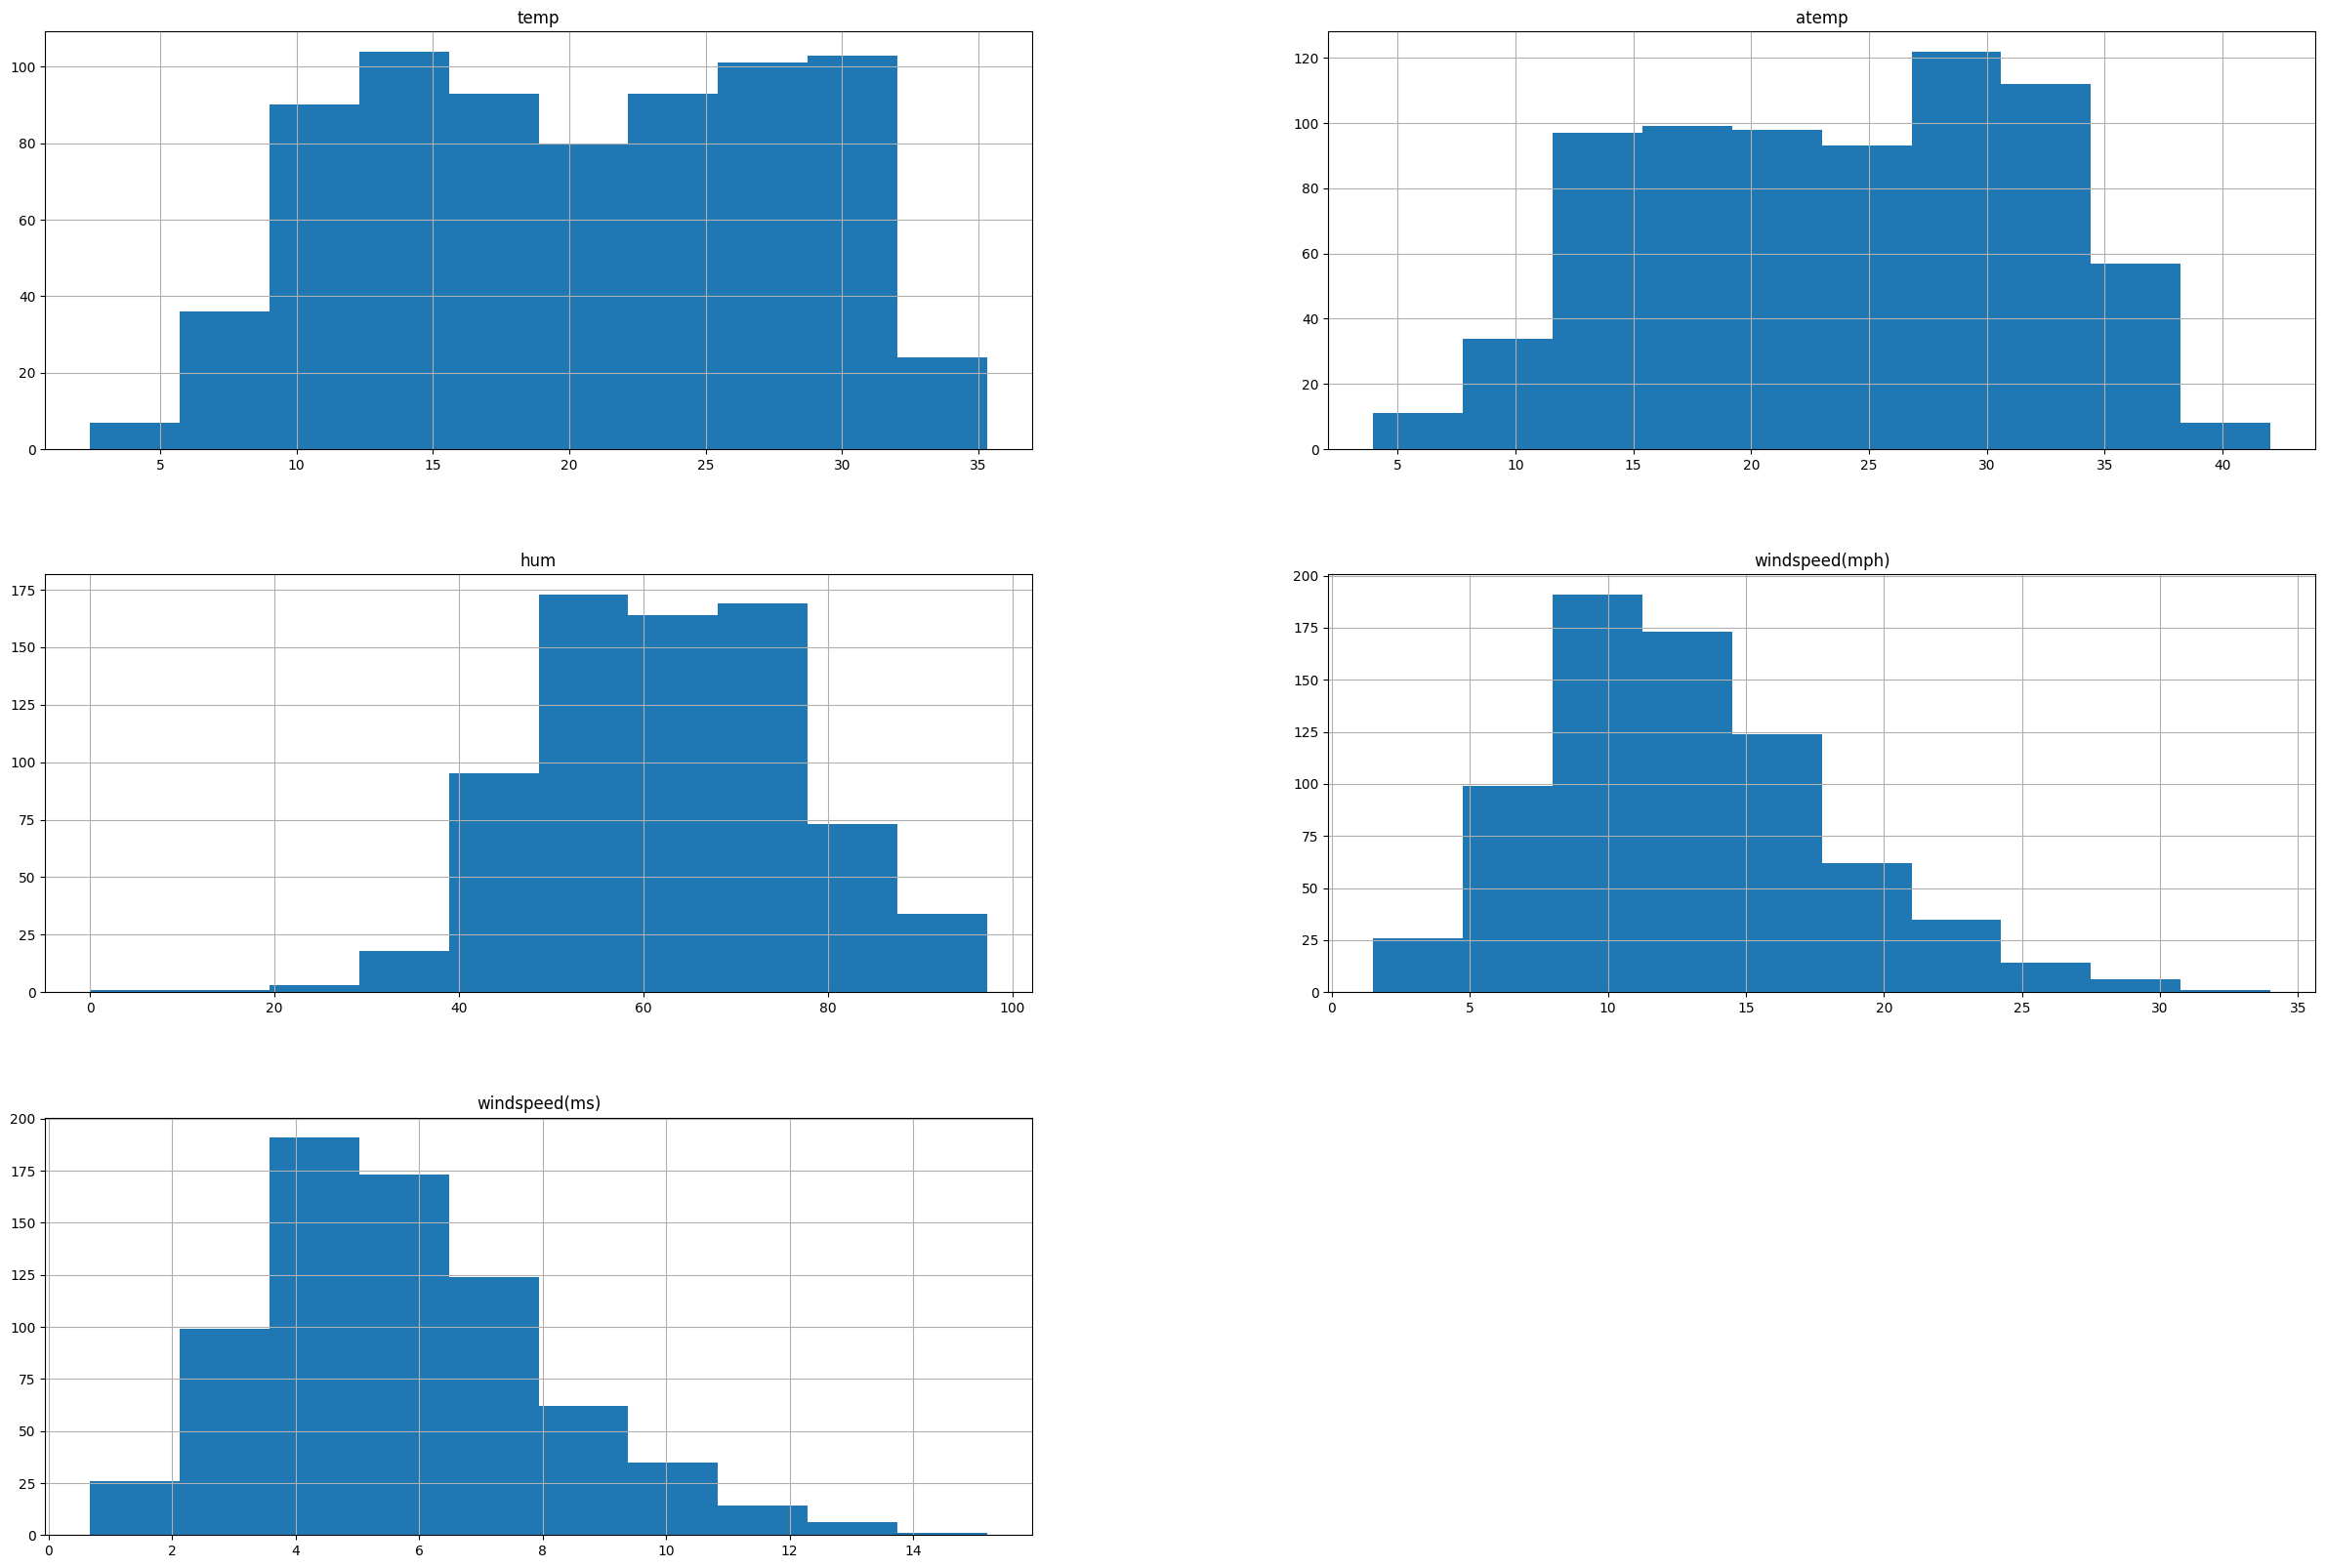

In [168]:
df[var_real].hist(figsize=(30, 20))

Тут нет выбросов, датасет уже очищен

__ж) [5 баллов]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие? 

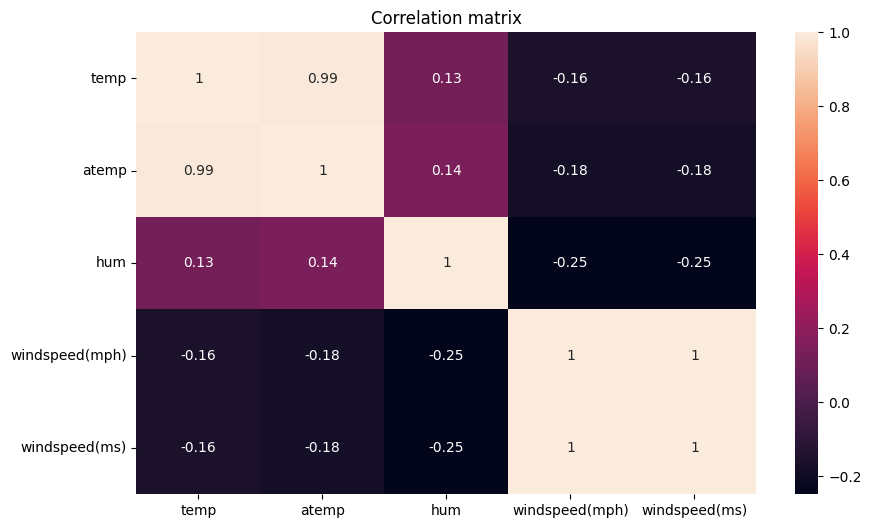

In [169]:
correlation = df[var_real].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation matrix')
plt.show()

__Ответ:__ atemp и windspeed(ms) т.к. темпиратура по ощущениям скоррелированна с темпиратурой, а скорость ветра в миллисекундах скоррелированна с ней же в mph.Можно убрать любые из скоррелированных признаках при этом качество будующей модели не изменится

__з) [5 баллов]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое"? 

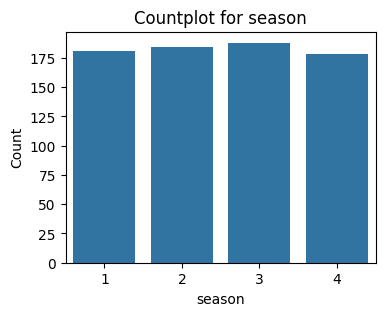

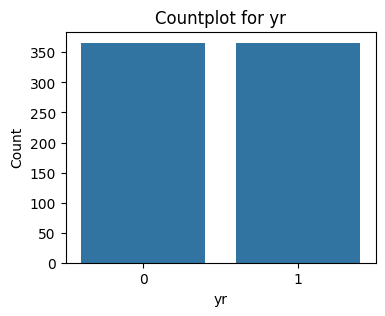

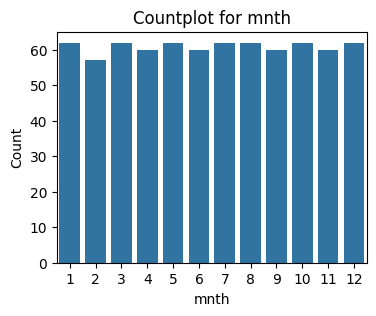

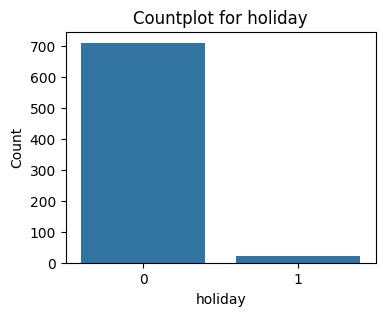

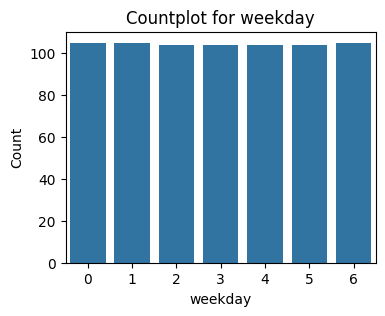

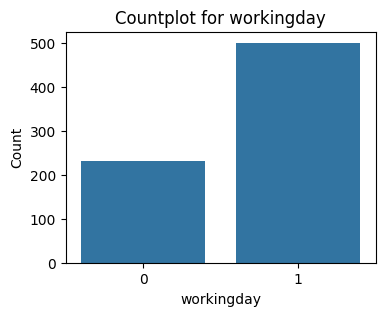

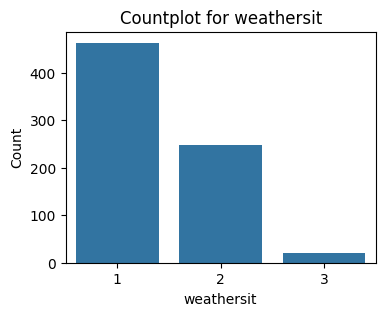

In [170]:
for var in var_cat:
    plt.figure(figsize=(4, 3))
    sns.countplot(df, x = var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Countplot for {var}')
    plt.show()

__Ответ:__  Категории указывающие день/неделю/месяц/сезон равнораспределены. А рабочий ли день или идут ли сейчас каникулы распределены неравномерно (как и в году). Интересно, что в большей части наблюдений погода хорошая, а категория "ливень/туман" вообще не представлена

__и) [5 баллов]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось? 

In [171]:
df_ohe = pd.get_dummies(df[var_cat])

In [172]:
df_encoded = pd.concat([df[var_real], df_ohe, df['cnt']], axis=1)
df_encoded.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,14.110847,18.18125,80.5833,10.749882,4.805490,1,0,1,0,6,0,2,985
1,14.902598,17.68695,69.6087,16.652113,7.443949,1,0,1,0,0,0,2,801
2,8.050924,9.47025,43.7273,16.636703,7.437060,1,0,1,0,1,1,1,1349
3,8.200000,10.60610,59.0435,10.739832,4.800998,1,0,1,0,2,1,1,1562
4,9.305237,11.46350,43.6957,12.522300,5.597810,1,0,1,0,3,1,1,1600


Нисколько, категориальные перемнные итак представлены в удобном формате

__к) [5 баллов]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура. 

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость. 

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат. 

In [173]:
for var in var_real:
    df_encoded[f'{var}_square'] = df_encoded[var]**2

In [174]:
df_encoded.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,temp_square,atemp_square,hum_square,windspeed(mph)_square,windspeed(ms)_square
0,14.110847,18.18125,80.5833,10.749882,4.805490,1,0,1,0,6,0,2,985,199.116003,330.557852,6493.668239,115.559963,23.092738
1,14.902598,17.68695,69.6087,16.652113,7.443949,1,0,1,0,0,0,2,801,222.087427,312.828200,4845.371116,277.292867,55.412371
2,8.050924,9.47025,43.7273,16.636703,7.437060,1,0,1,0,1,1,1,1349,64.817377,89.685635,1912.076765,276.779887,55.309860
3,8.200000,10.60610,59.0435,10.739832,4.800998,1,0,1,0,2,1,1,1562,67.240000,112.489357,3486.134892,115.343991,23.049580
4,9.305237,11.46350,43.6957,12.522300,5.597810,1,0,1,0,3,1,1,1600,86.587436,131.411832,1909.314198,156.807997,31.335472


__л) [5 баллов]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

In [175]:
for var in var_real:
    df_encoded[f'{var}_sqrt'] = np.sqrt(df_encoded[var])

Возможно наоборот скорость ветра или темпиратура вносят "убывающее влияние" на cnt. Условно если темпиратура 10 градусов и растет на 5, то cnt вырастет сильнее, чем при росте на 5 градусов темпиратуры в 25. Т.е. вторая производная по некоторым признакам может быть отрицательной и я выбрал квадратный корень для описания такого рода зависимости.

## 2. Обучение модели

__а) [10 баллов]__  Разбейте выборку на тренировочную и тестовую.

In [176]:
np.random.seed(52)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_encoded, test_size = 0.3, random_state = 0)

Рамзер тестовой выборки не указан,я обычно делал 0.3 так что тут тоже сделаю 0.3

__б) [10 баллов]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE. 

In [177]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [178]:
def cnt_rmse(act, pred):
    return sqrt(mean_squared_error(act, pred))

In [179]:
mean_cnt = np.mean(train['cnt'])
y_pred_naive = np.ones(len(test['cnt'])) * mean_cnt
cnt_rmse(test['cnt'], y_pred_naive)

2032.2607189960986

__в) [5 баллов]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют? 

__Ответ:__  Оно меняется, т.к. мы каждый раз делим выбоку по-разному. Это плохо как минимум потому что разные люди буду получать разные оценки rmse каждый раз. Также при перезапуске регрессия будет выдавать новые весы каждый раз и разные люди будут получать разные веса. Я исправляю это добавлением random_state = 0, однако можно просто писать np.random.seed(0) везде где используем рандомные функции деления или выбора.

__г) [10 баллов]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

Что вы видите на этой визуализации? Проинтерпретируйте картинку.

__Ответ:__ ...

In [180]:
np.random.seed(52)
from sklearn.linear_model import LinearRegression
X_train = train.drop('cnt', axis = 1)
X_test = test.drop('cnt', axis = 1)
y_train = train['cnt']
y_test = test['cnt']
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [181]:
cnt_rmse(y_test, y_pred)

1092.4908609096938

Мы достаточно сильно улучшили качество (почти в 2 раза)

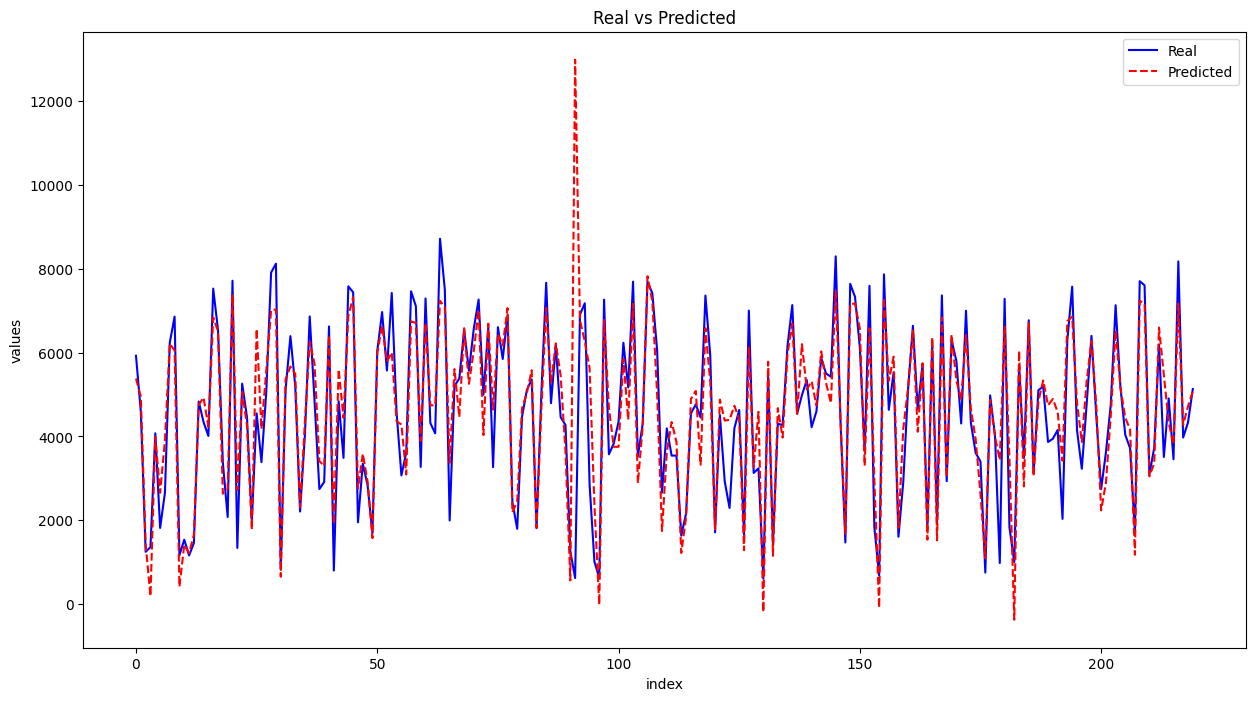

In [182]:
def plot_yreal_ypred(y_real, y_pred, title='Real vs Predicted'):
    plt.figure(figsize=(15, 8))
    plt.plot(y_real.values, label='Real', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
    plt.xlabel('index')
    plt.ylabel('values')
    plt.title(title)
    plt.legend()
    plt.show()

plot_yreal_ypred(y_test, y_pred)


На самом деле видно, что наша регрессия довольно хорошо описывает значения. Однако часто выдает значение чуть меньше.больше реального особенно при высоких значениях cnt

__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло? 

__Ответ:__  ...

In [183]:
feature_names = X_train.columns
coefficients = lr.coef_
lr_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
lr_sorted = lr_df.sort_values(by = 'Coefficient', ascending=False)
lr_sorted

,Feature,Coefficient
3,windspeed(mph),6.680606e+12
20,windspeed(mph)_sqrt,2.604871e+12
16,windspeed(ms)_square,4.194779e+11
0,temp,2.620317e+03
6,yr,1.875448e+03
2,hum,4.920660e+02
5,season,4.168256e+02
1,atemp,2.355521e+02
9,weekday,7.139923e+01
10,workingday,7.086210e+01


## 3. Бонус

__a) [2 балла]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$. 

* Каким получилось качество прогноза? 
* Что в модели произошло с коэффициентами?  

In [184]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__Ответ:__   ....

__б) [0 баллов]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом. 

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [185]:
from sklearn.linear_model import Lasso, Ridge

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [186]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

NameError: name 'X' is not defined

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

Text(0.5, 1.0, 'Ridge')

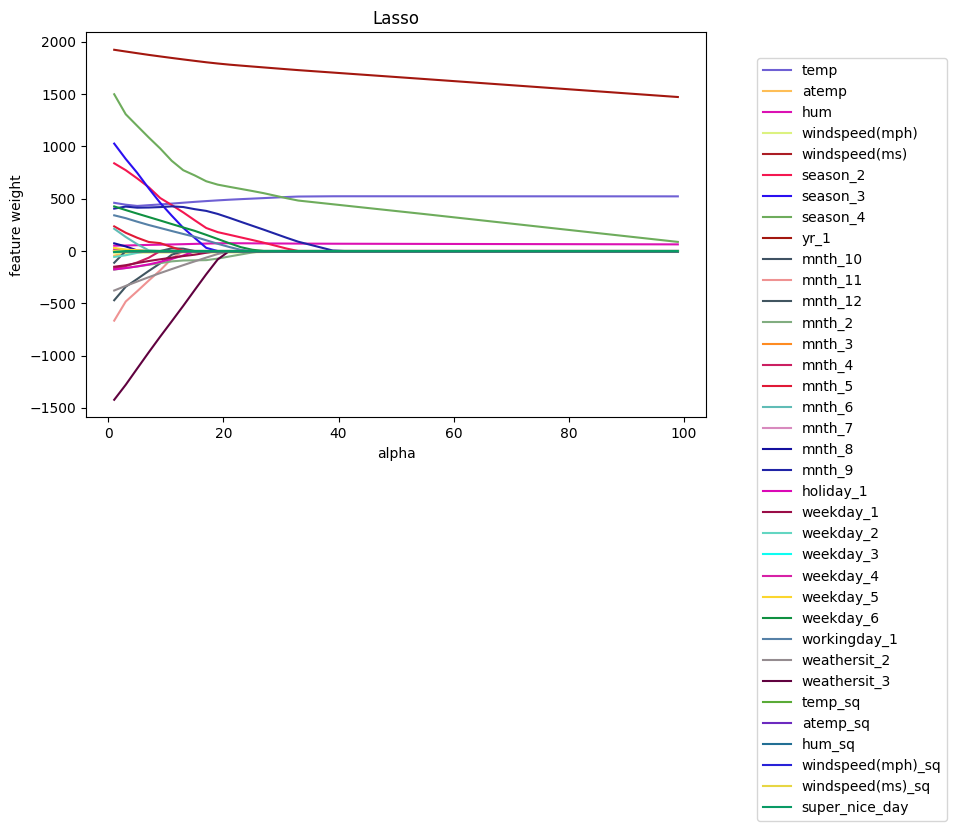

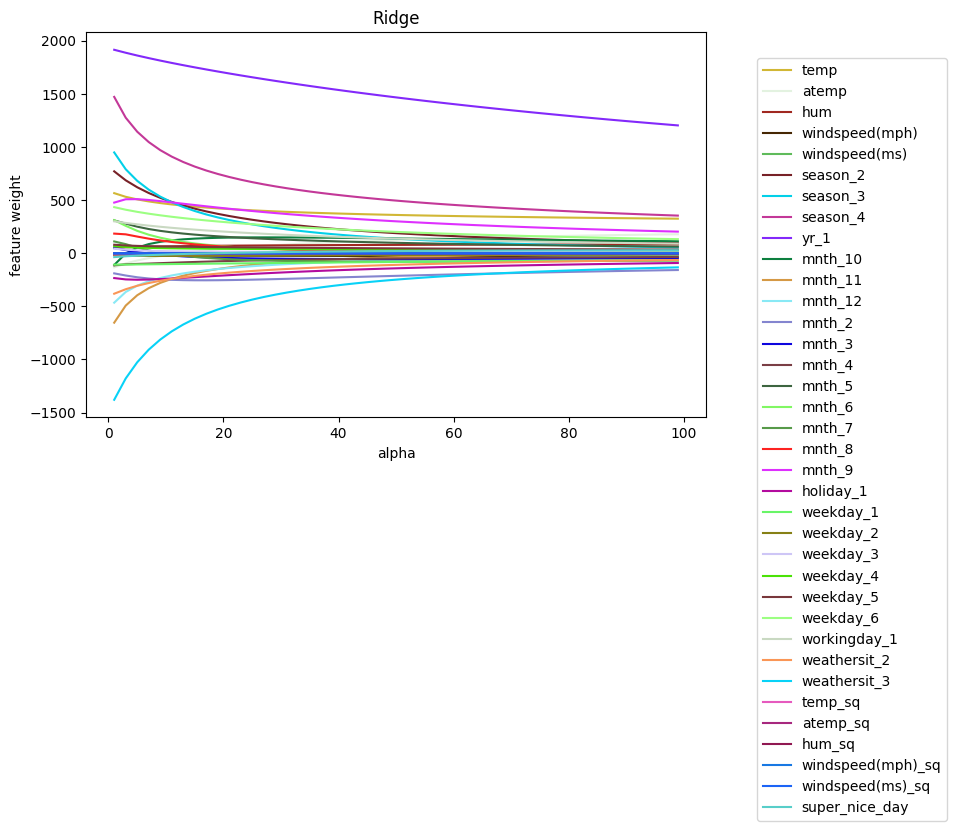

In [ ]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним. 

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться. 

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

__в) [2 балла]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение? 
 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__г) [2 балла]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__д) [2 балла]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__Ответ:__  ....

__е) [2 балла]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение? 

__Ответ:__  ...